In [1]:
import pandas as pd
import delicardservice as ds
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_theme()
cardNr = "123456"
password = "abcd"
ds.scrapeDelicardApi(cardNr,password)
ds.mergeDataDumps(cardNr)
data: pd.DataFrame = ds.getDataframe(cardNr)

# overview of the data
data

datum    ortName        kaName  typName  \
transFullId posId                                                         
10-3419-37  1     2022-12-08 11:36:00  Cafeteria  Cafeteria 10  Verkauf   
            2     2022-12-08 11:36:00  Cafeteria  Cafeteria 10  Verkauf   
            3     2022-12-08 11:36:00  Cafeteria  Cafeteria 10  Verkauf   
7-4003-599  1     2022-12-08 12:58:00      Mensa  Mensakasse 7  Verkauf   
            2     2022-12-08 12:58:00      Mensa  Mensakasse 7  Verkauf   
...                               ...        ...           ...      ...   
5-2729-480  2     2023-03-28 12:53:00      Mensa  Mensakasse 5  Verkauf   
4-1001-447  1     2023-04-04 13:12:00      Mensa  Mensakasse 4  Verkauf   
            2     2023-04-04 13:12:00      Mensa  Mensakasse 4  Verkauf   
            3     2023-04-04 13:12:00      Mensa  Mensakasse 4  Verkauf   
            4     2023-04-04 13:12:00      Mensa  Mensakasse 4  Verkauf   

                   zahlBetrag                       name  menge  epreis  \
transFullId posId                                                         
10-3419-37  1            -3.5         Kaffee, Pfandtasse      1     1.2   
            2            -3.5           Tassenpfand plus      1     1.0   
            3            -3.5        Brötchen mit Salami      1     1.3   
7-4003-599  1            -4.4          Stamm HK Essen 10      2     2.2   
            2            -4.4       Tafelwasser 0,3l Gl.      1     0.3   
...                       ...                        ...    ...     ...   
5-2729-480  2            -2.8       Tafelwasser 0,3l Gl.      1     0.3   
4-1001-447  1            -4.7      Stamm Gemüsebeilage 1      1     0.8   
            2            -4.7  Stamm Sättigungsbeilage 1      1     0.8   
            3            -4.7        Aktionsessen 3,10 €      1     3.1   
            4            -4.7       Tafelwasser 0,2l Gl.      1     0.2   

                   gpreis  rabatt  
transFullId posId                  
10-3419-37  1         1.2     NaN  
            2         1.0     NaN  
            3         1.3     NaN  
7-4003-599  1         4.4     NaN  
            2         0.0     0.3  
...                   ...     ...  
5-2729-480  2         0.0     0.3  
4-1001-447  1         0.8     NaN  
            2         0.8     NaN  
            3         3.1     NaN  
            4         0.0     0.2  

[273 rows x 10 columns]

In [2]:
def convertEuro(float):
    '''Converts a number in € format.'''
    return "{:,.2f}€".format(float)

# Show coffee and tea spendings
result = data[data["name"].str.contains("Kaffee|Tee")]
spendings = convertEuro(result["gpreis"].sum())
print(f"Insgesamt wurden {spendings} für heiße Getränkte ausgegeben!")
# total spendings
totalCosts = convertEuro(data["gpreis"].sum())
print(f"Insgesamt wurden {totalCosts} im Betrachtungszeitraum ({data['datum'].min().date()} bis {data['datum'].max().date()}) ausgegeben!")

Insgesamt wurden 27.60€ für heiße Getränkte ausgegeben!
Insgesamt wurden 600.90€ im Betrachtungszeitraum (2022-12-08 bis 2023-04-04) ausgegeben!


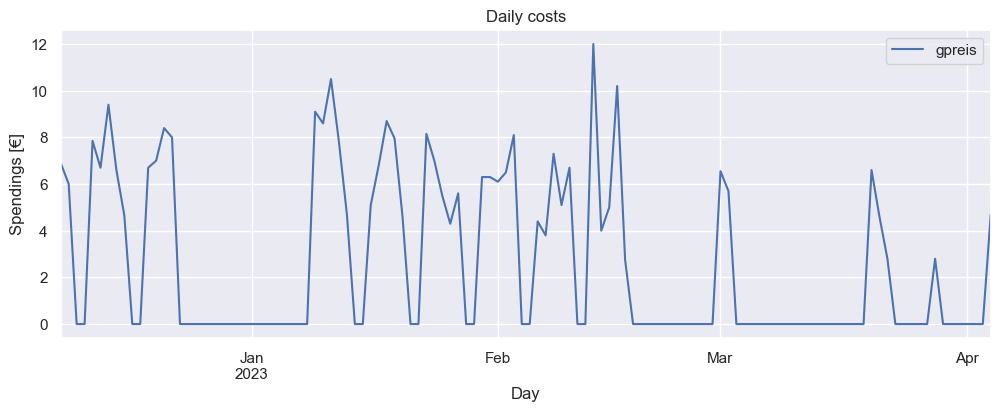

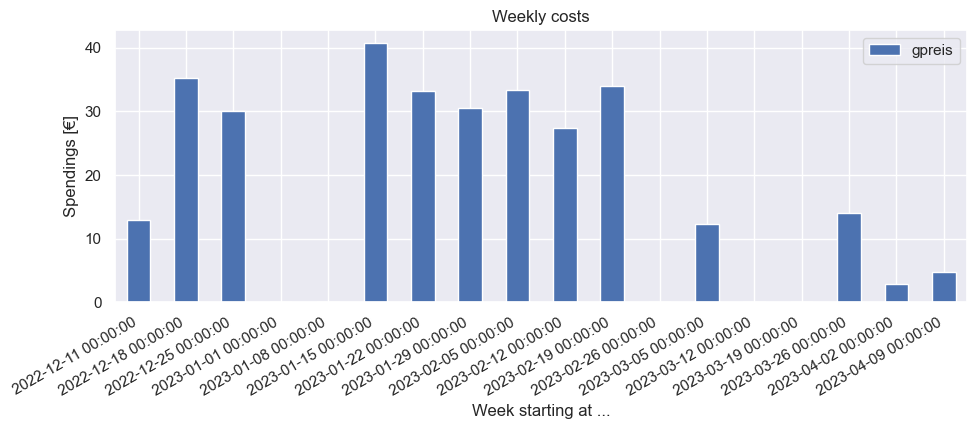

In [3]:
# Show graphs about total spendings per day/week

# remove balance top-ups (~ is a `not` operator)
dailycosts = data[~data["name"].isin(["Karte aufwerten","Aufwertung"])]
dailycosts = dailycosts.resample("D", on="datum")["datum", "gpreis"].sum("gpreis")

# spendings per day
dailycosts.plot(kind="line", figsize=(12,4), title="Daily costs", xlabel="Day", ylabel="Spendings [€]")

# spendings per week
weeklycosts = dailycosts.resample("W").sum()
weeklycosts.plot(kind="bar", figsize=(11,4), title="Weekly costs", xlabel="Week starting at ...", ylabel="Spendings [€]")
plt.gcf().autofmt_xdate()

   